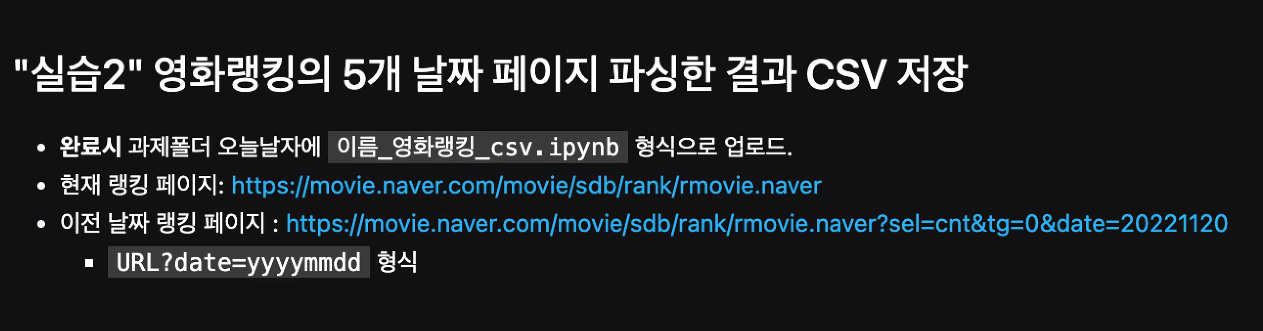### 221117 ~ 221121 일까지의 영화랭킹 알아보기 (BeautifulSoup 사용)

In [155]:
if __name__ == '__main__':
    
    crawling('20221117', 5)
    
    to_csv("data/movie_rank.csv")

data/movie_rank.csv파일이 저장되었습니다.


In [153]:
def crawling(start:str, due:int):
    import requests
    from bs4 import BeautifulSoup
    
    s = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date='
    dates = []
    for i in range(due):
        dates.append(str(int(start)+i))
    
    m_rank={}
    for d in dates:
        m_name =[]
        response = requests.get(s+d)
        soup = BeautifulSoup(response.text)
        tags = soup.select('div[class=tit3]')
    
        for tag in tags:
            m_name.append(tag.text.strip())
        
        m_rank[d]=m_name  

In [154]:
def to_csv(filename:str):
    import csv
    with open(filename,'w',newline='',encoding='utf-8') as csvfile:
        s_writer = csv.writer(csvfile)
        s_writer.writerow(['날짜','영화순위'])
    
        result = m_rank.items()
        for i in result:
            s_writer.writerow(i)
    print(filename+"파일이 저장되었습니다.")